In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
data=pd.read_csv('Smoking.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [5]:
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [6]:
data=data.rename(columns={'systolic':'blood_pressure',
                    'tartar':'dental_calculus',
                    })

- **Triglycerides are a type of fat (lipid) found in your blood. They store unused calories and provide energy to the body.
Normal Range:
<150 mg/dL: Normal
150–199 mg/dL: Borderline high
200–499 mg/dL: High
≥500 mg/dL: Very high (increased risk of pancreatitis)**

- **HDL is often called "good cholesterol" because it helps remove other forms of cholesterol from the bloodstream. Higher levels are better for cardiovascular health.
Normal Range:
≥60 mg/dL: Optimal (protective against heart disease).
40–59 mg/dL: Acceptable (for men, slightly lower for women).
<40 mg/dL: Low (risk factor for heart disease).**

- **LDL is often called "bad cholesterol" because high levels can lead to the buildup of plaque in arteries, increasing the risk of heart attack and stroke.
Normal Range:
<100 mg/dL: Optimal
100–129 mg/dL: Near optimal
130–159 mg/dL: Borderline high
160–189 mg/dL: High
≥190 mg/dL: Very high**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  blood_pressure       55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [8]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
blood_pressure         0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
dental_calculus        0
smoking                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  blood_pressure       55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [10]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),blood_pressure,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,dental_calculus,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [11]:
data['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [12]:
data.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),blood_pressure,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [13]:
continuous=['age','blood_pressure','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp']
discrete_categorical=['gender','dental_calculus','smoking']

In [14]:
data[discrete_categorical].describe()

,smoking
count,55692.000000
mean,0.367288
std,0.482070
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
data['oral'].value_counts()

Y    55692
Name: oral, dtype: int64

In [16]:
data['oral'].unique()

array(['Y'], dtype=object)

In [17]:
data=data.drop(columns='oral')

In [18]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),blood_pressure,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [19]:
data['smoking'].unique()

array([0, 1], dtype=int64)

In [20]:
data['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [21]:
data['smoking']=data['smoking'].replace({0:'No',1:'Yes'})
# we can do it via .map in place of .replace also

In [22]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),blood_pressure,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,No
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,No
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,Yes
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,No
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,No


In [23]:
data=data.drop(columns=['height(cm)','waist(cm)',"weight(kg)",'eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','relaxation'])

In [24]:
data['smoking'].value_counts()

No     35237
Yes    20455
Name: smoking, dtype: int64

In [25]:
data['dental_calculus'].value_counts()

Y    30940
N    24752
Name: dental_calculus, dtype: int64

In [26]:
data[continuous].describe()

,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,121.494218,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201
std,12.071418,13.675989,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539
min,20.000000,71.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000
25%,40.000000,112.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000
50%,40.000000,120.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000
75%,55.000000,130.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000
max,85.000000,240.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000


In [27]:
data[continuous].skew()

age                     0.268053
blood_pressure          0.469780
fasting blood sugar     4.509412
Cholesterol             0.392355
triglyceride            1.313403
HDL                     1.955282
LDL                    10.673511
hemoglobin             -0.655237
Urine protein           5.625088
serum creatinine        9.401928
AST                    25.147528
ALT                    34.686797
Gtp                     6.744798
dtype: float64

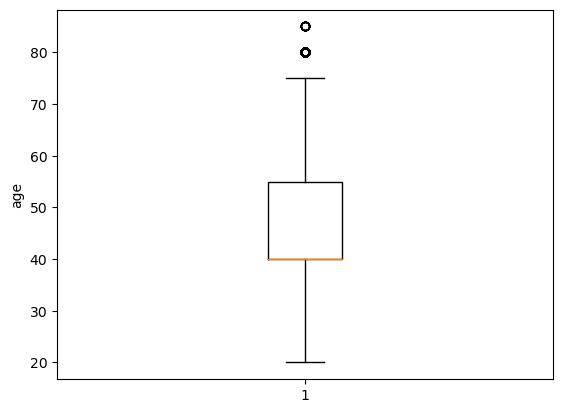

In [28]:
plt.boxplot(data['age'])
plt.ylabel('age')
plt.show()

In [29]:
Q1=40
Q3=55
IQR=Q3-Q1
IQR

15

In [30]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=data[(data['age']<lower_lim) | (data['age']>upper_lim)]
print(lower_lim)
print(upper_lim)

17.5
77.5


In [31]:
outlier

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
44,54,F,80,133.0,95.0,165.0,164.0,49.0,83.0,12.8,1.0,0.5,33.0,29.0,17.0,0,N,No
239,309,F,80,136.0,112.0,254.0,144.0,63.0,162.0,14.4,1.0,1.0,21.0,13.0,30.0,0,Y,No
312,396,M,80,90.0,84.0,175.0,188.0,58.0,79.0,14.6,1.0,0.8,27.0,23.0,15.0,0,N,No
600,746,F,80,134.0,102.0,251.0,73.0,72.0,164.0,13.2,1.0,0.6,19.0,16.0,14.0,1,Y,No
720,898,M,80,136.0,110.0,147.0,85.0,53.0,77.0,11.4,1.0,1.0,17.0,11.0,16.0,0,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55061,52459,M,80,151.0,105.0,181.0,40.0,70.0,103.0,15.0,1.0,0.9,21.0,20.0,35.0,0,N,No
55392,54169,M,80,148.0,93.0,221.0,163.0,41.0,147.0,11.1,1.0,1.4,37.0,28.0,84.0,1,Y,No
55521,54887,M,85,131.0,125.0,154.0,157.0,53.0,93.0,13.0,1.0,1.2,20.0,10.0,12.0,0,N,No
55569,55076,M,80,109.0,110.0,194.0,74.0,64.0,115.0,12.7,1.0,1.0,25.0,13.0,30.0,1,N,No


In [32]:
outlier['smoking'].value_counts()

No     264
Yes     31
Name: smoking, dtype: int64

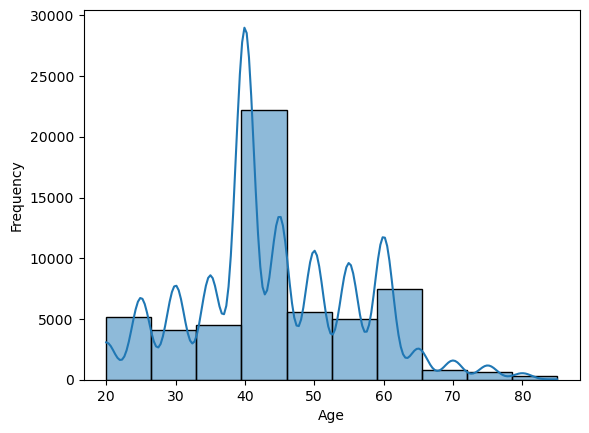

In [33]:
sns.histplot(data=data['age'],bins=10,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [34]:
data[data['age']==85]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
2599,3267,F,85,134.0,100.0,236.0,117.0,67.0,146.0,14.7,1.0,0.6,22.0,8.0,12.0,1,Y,No
4342,5470,M,85,130.0,109.0,221.0,64.0,56.0,152.0,15.3,1.0,1.1,28.0,25.0,36.0,0,N,No
5246,6612,M,85,110.0,112.0,178.0,108.0,63.0,93.0,12.7,1.0,0.8,44.0,26.0,43.0,0,N,No
11310,14152,M,85,130.0,105.0,201.0,140.0,69.0,104.0,12.8,1.0,1.5,31.0,10.0,21.0,0,N,No
15959,19901,M,85,130.0,92.0,213.0,120.0,59.0,130.0,11.8,1.0,1.0,24.0,15.0,20.0,0,N,No
16394,20435,M,85,135.0,86.0,182.0,108.0,51.0,109.0,14.1,1.0,0.8,23.0,11.0,20.0,0,N,Yes
17822,22240,M,85,124.0,83.0,173.0,158.0,51.0,90.0,14.5,1.0,1.1,20.0,15.0,26.0,0,N,No
24345,30402,M,85,141.0,99.0,201.0,110.0,59.0,120.0,16.4,1.0,0.9,30.0,18.0,74.0,0,N,No
26913,33567,F,85,120.0,93.0,98.0,53.0,46.0,41.0,10.1,1.0,1.1,51.0,42.0,20.0,0,N,No
31166,38935,M,85,122.0,104.0,176.0,136.0,71.0,78.0,12.3,1.0,1.2,33.0,12.0,18.0,0,N,No


In [35]:
outlier.head()

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
44,54,F,80,133.0,95.0,165.0,164.0,49.0,83.0,12.8,1.0,0.5,33.0,29.0,17.0,0,N,No
239,309,F,80,136.0,112.0,254.0,144.0,63.0,162.0,14.4,1.0,1.0,21.0,13.0,30.0,0,Y,No
312,396,M,80,90.0,84.0,175.0,188.0,58.0,79.0,14.6,1.0,0.8,27.0,23.0,15.0,0,N,No
600,746,F,80,134.0,102.0,251.0,73.0,72.0,164.0,13.2,1.0,0.6,19.0,16.0,14.0,1,Y,No
720,898,M,80,136.0,110.0,147.0,85.0,53.0,77.0,11.4,1.0,1.0,17.0,11.0,16.0,0,Y,No


In [36]:
outlier['gender'].value_counts()

M    191
F    104
Name: gender, dtype: int64

In [37]:
outlier[(outlier['gender']=='F') &
        (outlier['smoking']=='Yes')]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
29149,36389,F,80,162.0,108.0,275.0,113.0,52.0,200.0,13.1,1.0,0.8,24.0,14.0,35.0,1,Y,Yes


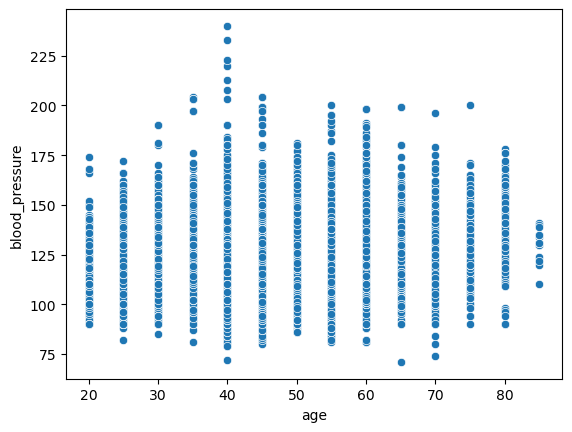

In [38]:
sns.scatterplot(x=data['age'],y=data['blood_pressure'])
#plt.scatter(x=data['age'],y=data['fasting blood sugar'])
plt.show()

In [39]:
data['age'].corr(data['blood_pressure'])

0.13402288170278137

In [40]:
data['age'].corr(data['fasting blood sugar'])

0.18235114178162257

In [41]:
data['age'].corr(data['Urine protein'])

0.029624794638577555

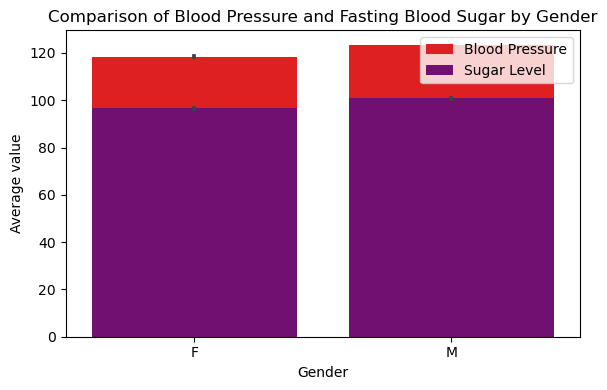

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(data=data,x='gender',y='blood_pressure',color='red',label='Blood Pressure')
sns.barplot(data=data,x='gender',y='fasting blood sugar',color='purple',label='Sugar Level')
plt.xlabel('Gender')
plt.ylabel('Average value')
plt.title('Comparison of Blood Pressure and Fasting Blood Sugar by Gender')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

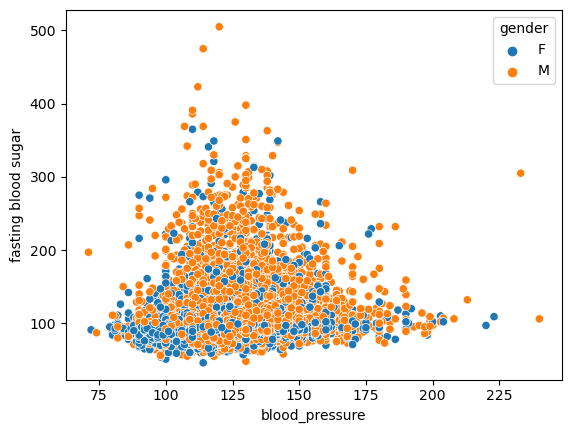

In [43]:
sns.scatterplot(x=data['blood_pressure'],y=data['fasting blood sugar'],hue=data['gender'])
plt.show()

In [44]:
data.groupby('gender')['smoking'].value_counts()

gender  smoking
F       No         19432
        Yes          859
M       Yes        19596
        No         15805
Name: smoking, dtype: int64

In [45]:
correlation=data[continuous].corr()
correlation

,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp
age,1.000000,0.134023,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031
blood_pressure,0.134023,1.000000,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724
fasting blood sugar,0.182351,0.172700,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.094047,0.041341,0.068772,0.087616,0.182414
Cholesterol,0.055557,0.059572,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.004259,-0.000129,0.026594,0.050676,0.083531
triglyceride,0.015102,0.198826,0.227746,0.247581,1.000000,-0.411752,0.025739,0.273353,0.033992,0.124986,0.101696,0.175164,0.301876
HDL,0.007047,-0.088487,-0.121274,0.168623,-0.411752,1.000000,-0.056398,-0.240095,-0.015334,-0.175325,-0.036705,-0.128795,-0.054325
LDL,0.043007,0.016569,-0.019615,0.738975,0.025739,-0.056398,1.000000,0.052903,-0.009123,0.027045,0.000388,0.031576,-0.007872
hemoglobin,-0.263078,0.186514,0.099921,0.061503,0.273353,-0.240095,0.052903,1.000000,0.021753,0.371382,0.120575,0.202025,0.223844
Urine protein,0.029625,0.046170,0.094047,-0.004259,0.033992,-0.015334,-0.009123,0.021753,1.000000,0.087682,0.052195,0.040070,0.064372
serum creatinine,-0.106118,0.072288,0.041341,-0.000129,0.124986,-0.175325,0.027045,0.371382,0.087682,1.000000,0.048548,0.083602,0.102411


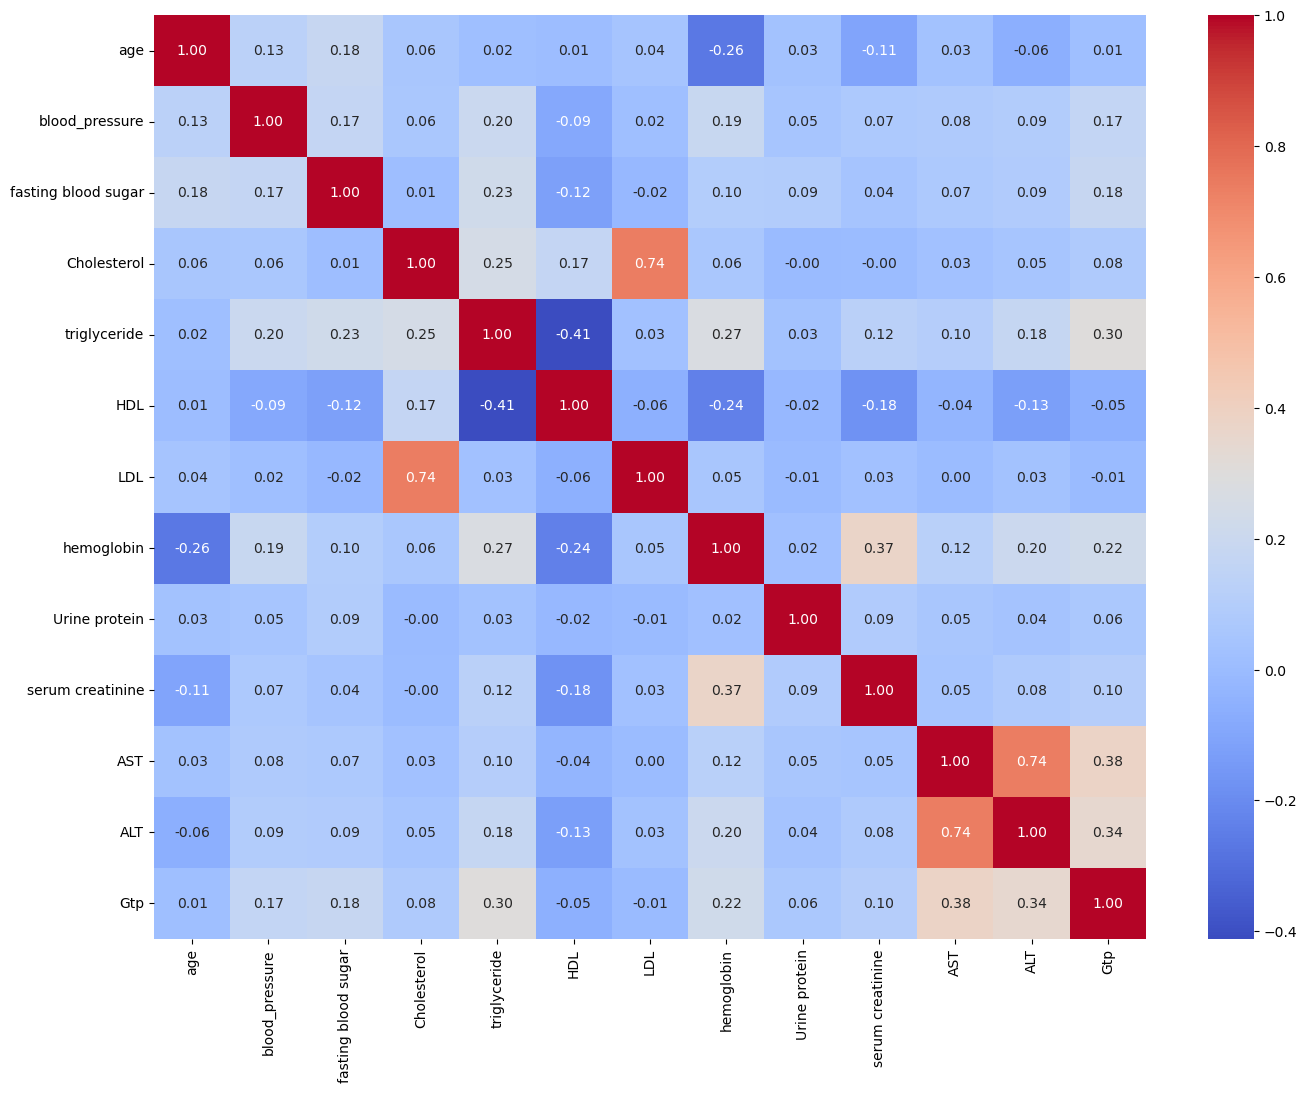

In [46]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [47]:
data['blood_pressure'].skew()

0.46977958027046773

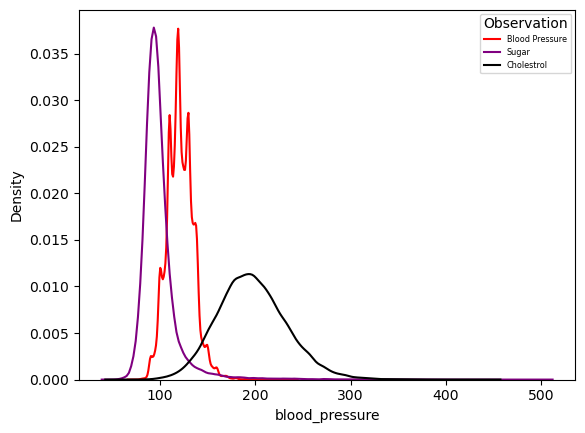

In [48]:
sns.kdeplot(x=data['blood_pressure'],label='Blood Pressure',color='red')
sns.kdeplot(x=data['fasting blood sugar'],label='Sugar',color='purple')
sns.kdeplot(x=data['Cholesterol'],label='Cholestrol',color='black')
plt.legend(title='Observation',fontsize='xx-small')
plt.show()

In [49]:
data['Cholesterol'].skew()

0.39235543866342504

In [50]:
from scipy.stats import shapiro
stat,p_value=shapiro(data['blood_pressure'])
print(f'statistic:{stat}, p-value:{p_value}')

statistic:0.9847252368927002, p-value:0.0


In [51]:
smoke_group=data.groupby('gender')['smoking'].value_counts().reset_index(name="counts")
smoke_group

,gender,smoking,counts
0,F,No,19432
1,F,Yes,859
2,M,Yes,19596
3,M,No,15805


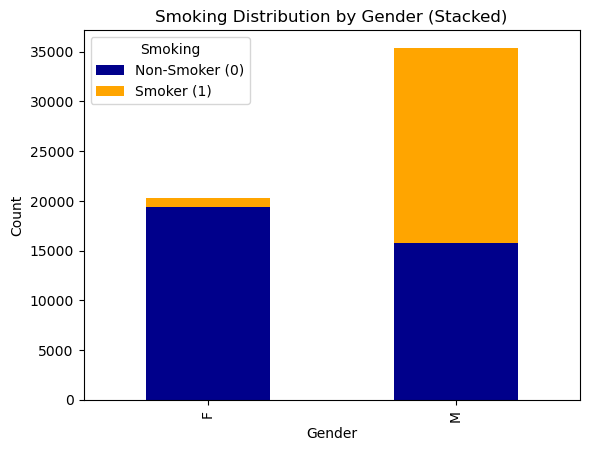

In [52]:
pivot_data = smoke_group.pivot(index='gender', columns='smoking', values='counts')

# Stacked bar chart
pivot_data.plot(kind='bar', stacked=True, color=['darkblue', 'orange'])

# Add labels and title
plt.title('Smoking Distribution by Gender (Stacked)')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Smoking', labels=['Non-Smoker (0)', 'Smoker (1)'])
plt.show()

# Heart disease risk

- **High triglycerides + low HDL + high LDL = Increased risk of heart disease.**
- They may also correlate with other conditions, such as obesity, diabetes, or metabolic syndrome.

In [53]:
data['triglyceride'].max()

999.0

In [54]:
data['triglyceride'].min()

8.0

In [55]:
data['triglyceride'].mean()

126.66569704804999

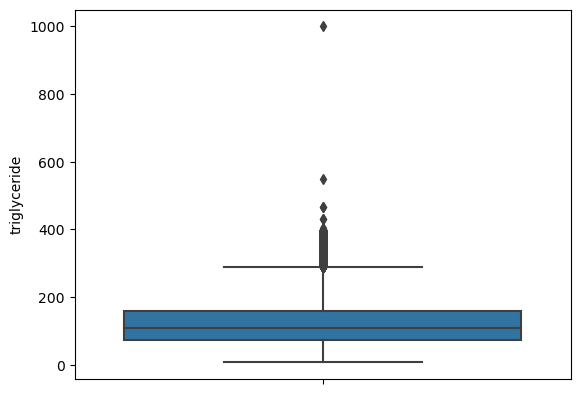

In [56]:
sns.boxplot(y=data['triglyceride'])
plt.show()

In [57]:
data[data['triglyceride']>500]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
6442,8128,M,45,151.0,108.0,320.0,999.0,41.0,50.0,15.6,1.0,1.0,21.0,20.0,77.0,0,Y,Yes
32764,40911,M,40,119.0,163.0,202.0,548.0,34.0,86.0,15.5,1.0,0.8,37.0,65.0,114.0,0,Y,Yes


In [58]:
data['triglyceride'].corr(data['Cholesterol'])

0.24758120215649787

In [59]:
risky_ldl=data[data['LDL']>190]
risky_ldl

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
3,3,M,40,100.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,No
115,141,M,60,120.0,100.0,293.0,98.0,66.0,207.0,14.1,1.0,1.3,25.0,24.0,25.0,1,N,No
120,147,M,45,139.0,108.0,300.0,160.0,71.0,197.0,15.3,1.0,1.2,30.0,29.0,64.0,0,Y,No
291,371,F,50,110.0,86.0,321.0,184.0,69.0,215.0,13.2,1.0,0.9,22.0,18.0,28.0,0,Y,No
373,474,M,60,138.0,108.0,270.0,82.0,60.0,193.0,15.8,1.0,1.0,24.0,19.0,30.0,0,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55434,54432,M,30,116.0,112.0,289.0,82.0,52.0,221.0,16.2,1.0,0.9,22.0,25.0,30.0,0,N,Yes
55470,54601,F,40,110.0,108.0,270.0,155.0,40.0,199.0,14.1,1.0,0.8,22.0,20.0,27.0,0,Y,No
55481,54651,M,30,139.0,103.0,303.0,95.0,51.0,233.0,15.3,1.0,1.1,23.0,19.0,14.0,0,Y,No
55658,55473,M,25,130.0,87.0,291.0,182.0,59.0,195.0,15.8,1.0,0.9,22.0,21.0,43.0,0,Y,No


In [60]:
risky_ldl['gender'].value_counts()

M    582
F    450
Name: gender, dtype: int64

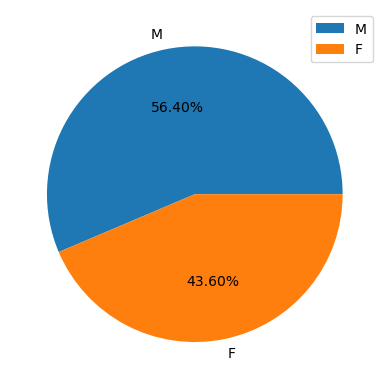

In [61]:
plt.pie(x=risky_ldl['gender'].value_counts(),
       labels=risky_ldl['gender'].value_counts().index.tolist(),
       autopct='%1.2f%%')
plt.legend()
plt.show()

**People with Risk of stroke and do smoking as well**

In [62]:
risky_ldl['smoking'].value_counts()

No     676
Yes    356
Name: smoking, dtype: int64

In [63]:
risky_ldl[(risky_ldl['gender']=='M') & (risky_ldl['smoking']=='Yes')]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
514,641,M,30,127.0,83.0,260.0,114.0,39.0,198.0,16.2,1.0,1.0,29.0,47.0,98.0,0,Y,Yes
537,669,M,35,111.0,91.0,282.0,219.0,45.0,193.0,14.8,1.0,1.4,23.0,21.0,40.0,0,Y,Yes
677,849,M,50,140.0,121.0,298.0,172.0,70.0,209.0,16.9,1.0,0.9,24.0,25.0,90.0,0,N,Yes
1052,1328,M,40,130.0,109.0,295.0,315.0,40.0,192.0,16.1,1.0,1.2,34.0,56.0,33.0,0,Y,Yes
1136,1430,M,45,128.0,102.0,311.0,91.0,59.0,234.0,15.8,1.0,0.9,20.0,19.0,23.0,0,N,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55195,53163,M,40,95.0,118.0,293.0,92.0,63.0,212.0,15.6,1.0,1.0,21.0,24.0,28.0,0,N,Yes
55252,53514,M,30,132.0,96.0,288.0,134.0,59.0,202.0,16.0,3.0,1.2,54.0,97.0,80.0,0,N,Yes
55395,54194,M,40,138.0,108.0,347.0,301.0,66.0,220.0,16.6,2.0,1.0,55.0,92.0,131.0,0,N,Yes
55434,54432,M,30,116.0,112.0,289.0,82.0,52.0,221.0,16.2,1.0,0.9,22.0,25.0,30.0,0,N,Yes


In [64]:
risky_ldl[(risky_ldl['gender']=='F') & (risky_ldl['smoking']=='Yes')]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
641,797,F,60,124.0,97.0,293.0,200.0,47.0,206.0,13.2,1.0,1.0,17.0,13.0,13.0,0,Y,Yes
4338,5466,F,60,151.0,104.0,338.0,100.0,67.0,251.0,12.8,1.0,0.7,26.0,15.0,28.0,1,Y,Yes
5395,6800,F,50,105.0,84.0,293.0,52.0,71.0,211.0,11.8,1.0,0.6,16.0,13.0,23.0,0,N,Yes
9072,11375,F,40,121.0,85.0,335.0,232.0,57.0,232.0,12.8,1.0,0.7,20.0,10.0,45.0,0,N,Yes
14399,17963,F,50,106.0,99.0,284.0,99.0,72.0,192.0,14.3,1.0,0.9,27.0,24.0,20.0,0,N,Yes
22991,28709,F,50,107.0,79.0,299.0,86.0,64.0,218.0,13.9,1.0,0.8,16.0,11.0,13.0,0,Y,Yes
25825,32258,F,50,94.0,82.0,279.0,145.0,47.0,203.0,13.5,1.0,0.9,22.0,17.0,20.0,0,N,Yes
27903,34828,F,55,109.0,90.0,270.0,38.0,71.0,191.0,12.5,1.0,1.0,25.0,16.0,18.0,0,Y,Yes
28766,35923,F,55,124.0,95.0,292.0,128.0,59.0,207.0,13.3,1.0,0.6,25.0,25.0,34.0,0,Y,Yes
29149,36389,F,80,162.0,108.0,275.0,113.0,52.0,200.0,13.1,1.0,0.8,24.0,14.0,35.0,1,Y,Yes


In [65]:
risky_ldl['age'].corr(risky_ldl['blood_pressure'])

0.012169485639264205

In [66]:
risky_ldl[continuous].describe()

,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,46.560078,122.993217,102.640504,291.629845,145.863372,56.273256,232.399225,14.837694,1.091085,0.907558,28.590116,32.930233,46.787791
std,10.461619,13.072763,24.358653,30.676033,68.033952,11.616693,159.255724,1.484790,0.467610,0.205881,14.106070,25.562858,43.342729
min,20.000000,90.000000,68.000000,139.000000,29.000000,31.000000,191.000000,9.400000,1.000000,0.300000,8.000000,4.000000,9.000000
25%,40.000000,114.000000,91.000000,276.000000,97.000000,48.000000,196.000000,13.700000,1.000000,0.800000,21.000000,18.000000,21.000000
50%,45.000000,122.000000,98.000000,289.000000,130.500000,55.000000,204.000000,14.900000,1.000000,0.900000,25.000000,25.000000,31.000000
75%,55.000000,131.000000,108.000000,306.000000,190.000000,64.000000,218.000000,16.000000,1.000000,1.000000,32.000000,37.000000,55.000000
max,80.000000,164.000000,349.000000,445.000000,396.000000,100.000000,1860.000000,18.800000,5.000000,2.200000,154.000000,217.000000,497.000000


In [67]:
heart_attack=risky_ldl[(risky_ldl['LDL']>190) & (risky_ldl['HDL']<40) & (risky_ldl['triglyceride']>=200)]
heart_attack

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
1229,1550,M,45,118.0,92.0,275.0,220.0,34.0,197.0,16.2,1.0,1.2,25.0,37.0,97.0,1,Y,Yes
2097,2637,M,40,114.0,96.0,300.0,264.0,38.0,209.0,15.4,1.0,1.0,28.0,36.0,38.0,0,Y,No
4319,5440,M,30,122.0,94.0,285.0,208.0,35.0,208.0,16.2,1.0,0.7,22.0,25.0,45.0,1,N,Yes
4825,6078,M,40,130.0,102.0,294.0,277.0,37.0,202.0,17.4,1.0,1.0,22.0,41.0,68.0,0,Y,No
8348,10480,M,60,104.0,109.0,287.0,221.0,39.0,204.0,16.1,1.0,1.2,24.0,30.0,64.0,0,Y,No
10141,12693,M,40,116.0,81.0,299.0,323.0,38.0,196.0,17.0,1.0,1.0,28.0,28.0,51.0,1,Y,Yes
10626,13302,M,35,112.0,94.0,284.0,237.0,39.0,198.0,15.1,1.0,1.0,37.0,65.0,41.0,1,Y,Yes
17400,21701,M,50,110.0,205.0,299.0,300.0,37.0,202.0,16.0,1.0,0.9,27.0,35.0,35.0,0,Y,Yes
19214,23994,M,40,110.0,87.0,313.0,220.0,36.0,233.0,16.1,1.0,1.1,33.0,61.0,62.0,0,N,Yes
19650,24526,M,45,102.0,114.0,297.0,208.0,38.0,217.0,15.9,1.0,1.0,29.0,45.0,66.0,0,Y,Yes


In [68]:
heart_attack.shape

(23, 18)

In [69]:
heart_attack['gender'].value_counts()

M    21
F     2
Name: gender, dtype: int64

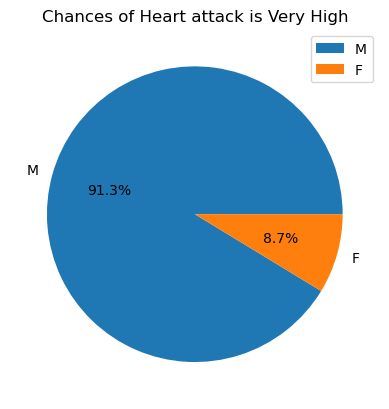

In [70]:
plt.pie(x=heart_attack['gender'].value_counts(),
       labels=heart_attack['gender'].value_counts().index.tolist(),
       autopct='%0.1f%%')
plt.title("Chances of Heart attack is Very High")
plt.legend()
plt.show()

In [71]:
heart_attack['smoking'].value_counts()

Yes    15
No      8
Name: smoking, dtype: int64

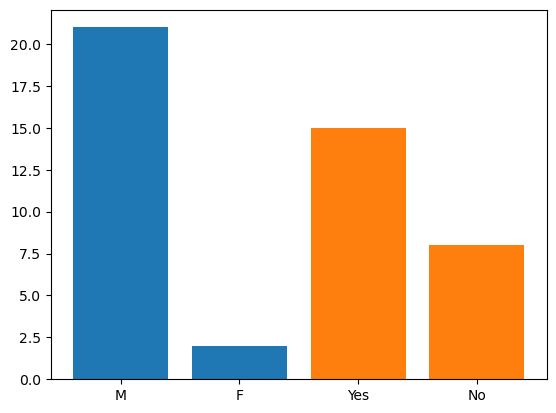

In [72]:
plt.bar(heart_attack['gender'].value_counts().index.tolist(),heart_attack['gender'].value_counts())
plt.bar(heart_attack['smoking'].value_counts().index.tolist(),heart_attack['smoking'].value_counts())
plt.show()

# Gender wise Smoking

In [73]:
data['gender'].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [74]:
data['smoking'].value_counts()

No     35237
Yes    20455
Name: smoking, dtype: int64

In [75]:
gender_smoking=data.groupby('gender')['smoking'].value_counts().reset_index(name='total')
gender_smoking

,gender,smoking,total
0,F,No,19432
1,F,Yes,859
2,M,Yes,19596
3,M,No,15805


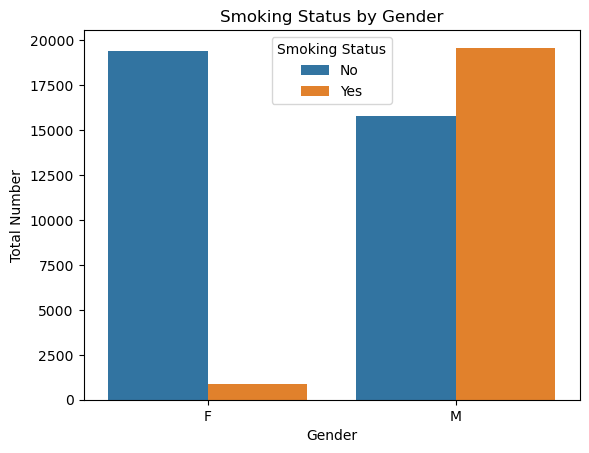

In [76]:
sns.barplot(data=gender_smoking,x='gender',y='total',hue='smoking')
plt.title("Smoking Status by Gender")
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.legend(title='Smoking Status')
plt.show()

# Age distribution

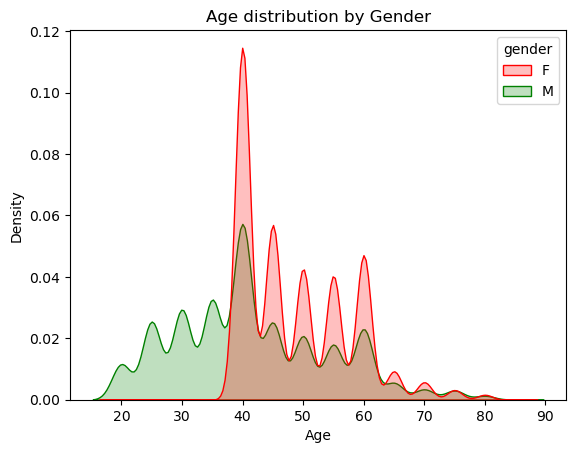

In [77]:
sns.kdeplot(data=data,x='age',hue='gender',fill=True,palette=['red','green'],common_norm=False)
plt.title('Age distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

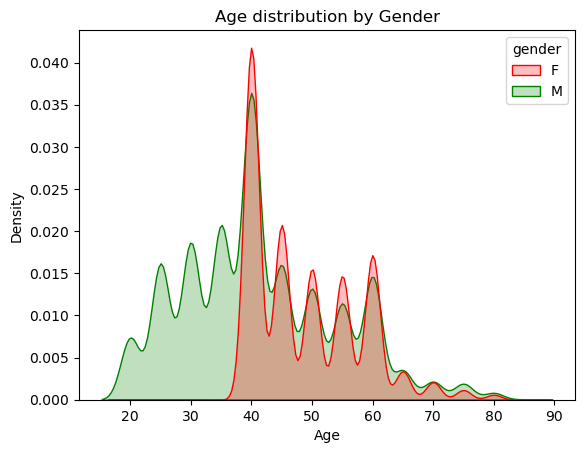

In [78]:
sns.kdeplot(data=data,x='age',hue='gender',fill=True,palette=['red','green'],common_norm=True)
plt.title('Age distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Hypertension

- How many individuals have hypertension (e.g., systolic ≥140 or diastolic ≥90)?
- Is there a significant difference in blood pressure between smokers and non-smokers?

In [79]:
hypertension=data[data['blood_pressure']>=140]
hypertension

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
7,7,M,45,153.0,158.0,222.0,269.0,34.0,134.0,15.0,1.0,1.3,38.0,71.0,111.0,0,Y,No
25,32,M,35,140.0,101.0,191.0,218.0,39.0,108.0,17.6,1.0,1.0,30.0,54.0,99.0,0,Y,Yes
34,41,M,50,142.0,91.0,148.0,130.0,48.0,74.0,13.8,1.0,1.0,43.0,45.0,202.0,0,N,Yes
35,42,M,40,147.0,86.0,229.0,82.0,71.0,142.0,15.7,1.0,1.3,27.0,19.0,22.0,0,Y,Yes
94,117,F,50,160.0,88.0,261.0,308.0,43.0,156.0,15.5,1.0,0.9,24.0,17.0,21.0,0,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55660,55481,F,60,142.0,116.0,187.0,87.0,52.0,118.0,12.4,1.0,0.6,31.0,39.0,19.0,0,N,No
55665,55534,F,55,171.0,99.0,259.0,147.0,64.0,165.0,14.0,1.0,0.8,27.0,22.0,22.0,0,Y,No
55668,55569,M,40,142.0,105.0,206.0,143.0,44.0,133.0,16.3,1.0,1.2,44.0,90.0,48.0,0,Y,Yes
55674,55603,F,45,160.0,102.0,200.0,103.0,73.0,106.0,12.7,1.0,0.5,17.0,14.0,28.0,0,Y,No


In [80]:
hypertension=hypertension.drop(columns=['ID','Urine protein','serum creatinine','AST','ALT','Gtp','dental caries','dental_calculus'])

In [81]:
hypertension.head()

,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,smoking
7,M,45,153.0,158.0,222.0,269.0,34.0,134.0,15.0,No
25,M,35,140.0,101.0,191.0,218.0,39.0,108.0,17.6,Yes
34,M,50,142.0,91.0,148.0,130.0,48.0,74.0,13.8,Yes
35,M,40,147.0,86.0,229.0,82.0,71.0,142.0,15.7,Yes
94,F,50,160.0,88.0,261.0,308.0,43.0,156.0,15.5,No


In [82]:
hypertension['gender'].value_counts()

M    2948
F    1361
Name: gender, dtype: int64

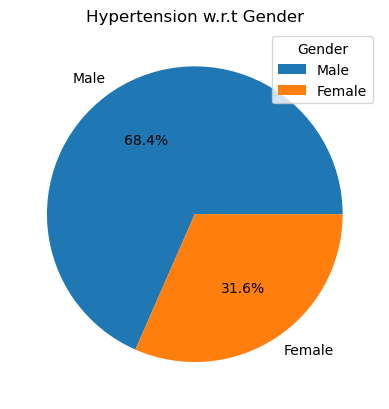

In [83]:
plt.pie(x=hypertension['gender'].value_counts(),
           labels=['Male','Female'],
       autopct="%0.1f%%")
plt.title("Hypertension w.r.t Gender")
plt.legend(title='Gender',loc='upper right')
plt.show()

In [84]:
hypertension['smoking'].value_counts()

No     2724
Yes    1585
Name: smoking, dtype: int64

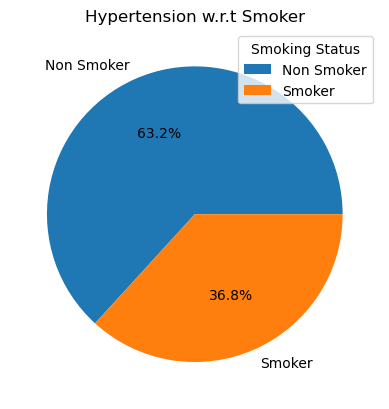

In [85]:
plt.pie(x=hypertension['smoking'].value_counts(),
           labels=['Non Smoker','Smoker'],
       autopct="%0.1f%%")
plt.title("Hypertension w.r.t Smoker")
plt.legend(title='Smoking Status',loc='upper right')
plt.show()

In [86]:
hypertension_smoking=hypertension.groupby('gender')['smoking'].value_counts().reset_index(name='total')
hypertension_smoking

,gender,smoking,total
0,F,No,1324
1,F,Yes,37
2,M,Yes,1548
3,M,No,1400


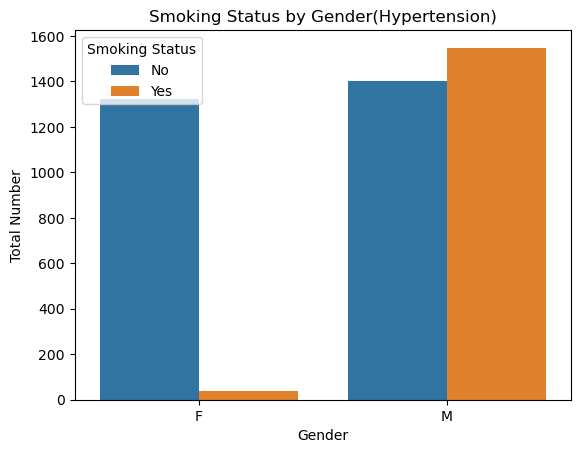

In [87]:
sns.barplot(data=hypertension_smoking,x='gender',y='total',hue='smoking')
plt.title("Smoking Status by Gender(Hypertension)")
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.legend(title='Smoking Status')
plt.show()

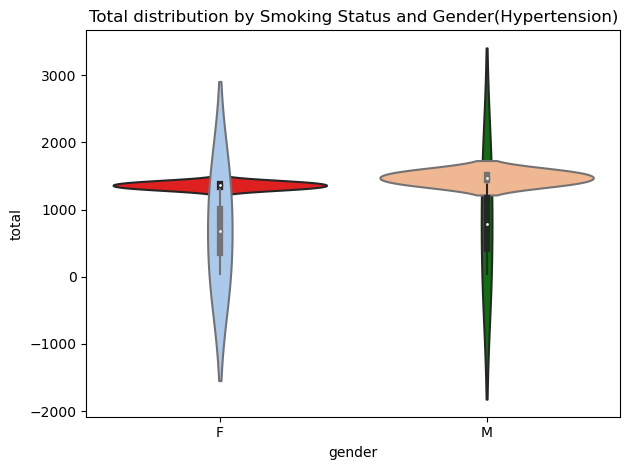

In [88]:
sns.violinplot(data=hypertension_smoking,x='smoking',y='total',palette=['red','green'],label="Smoking Status")
sns.violinplot(data=hypertension_smoking,x='gender',y='total',palette='pastel',label='Gender')
plt.title("Total distribution by Smoking Status and Gender(Hypertension)")
plt.tight_layout()
plt.show()

<Figure size 2000x2400 with 0 Axes>

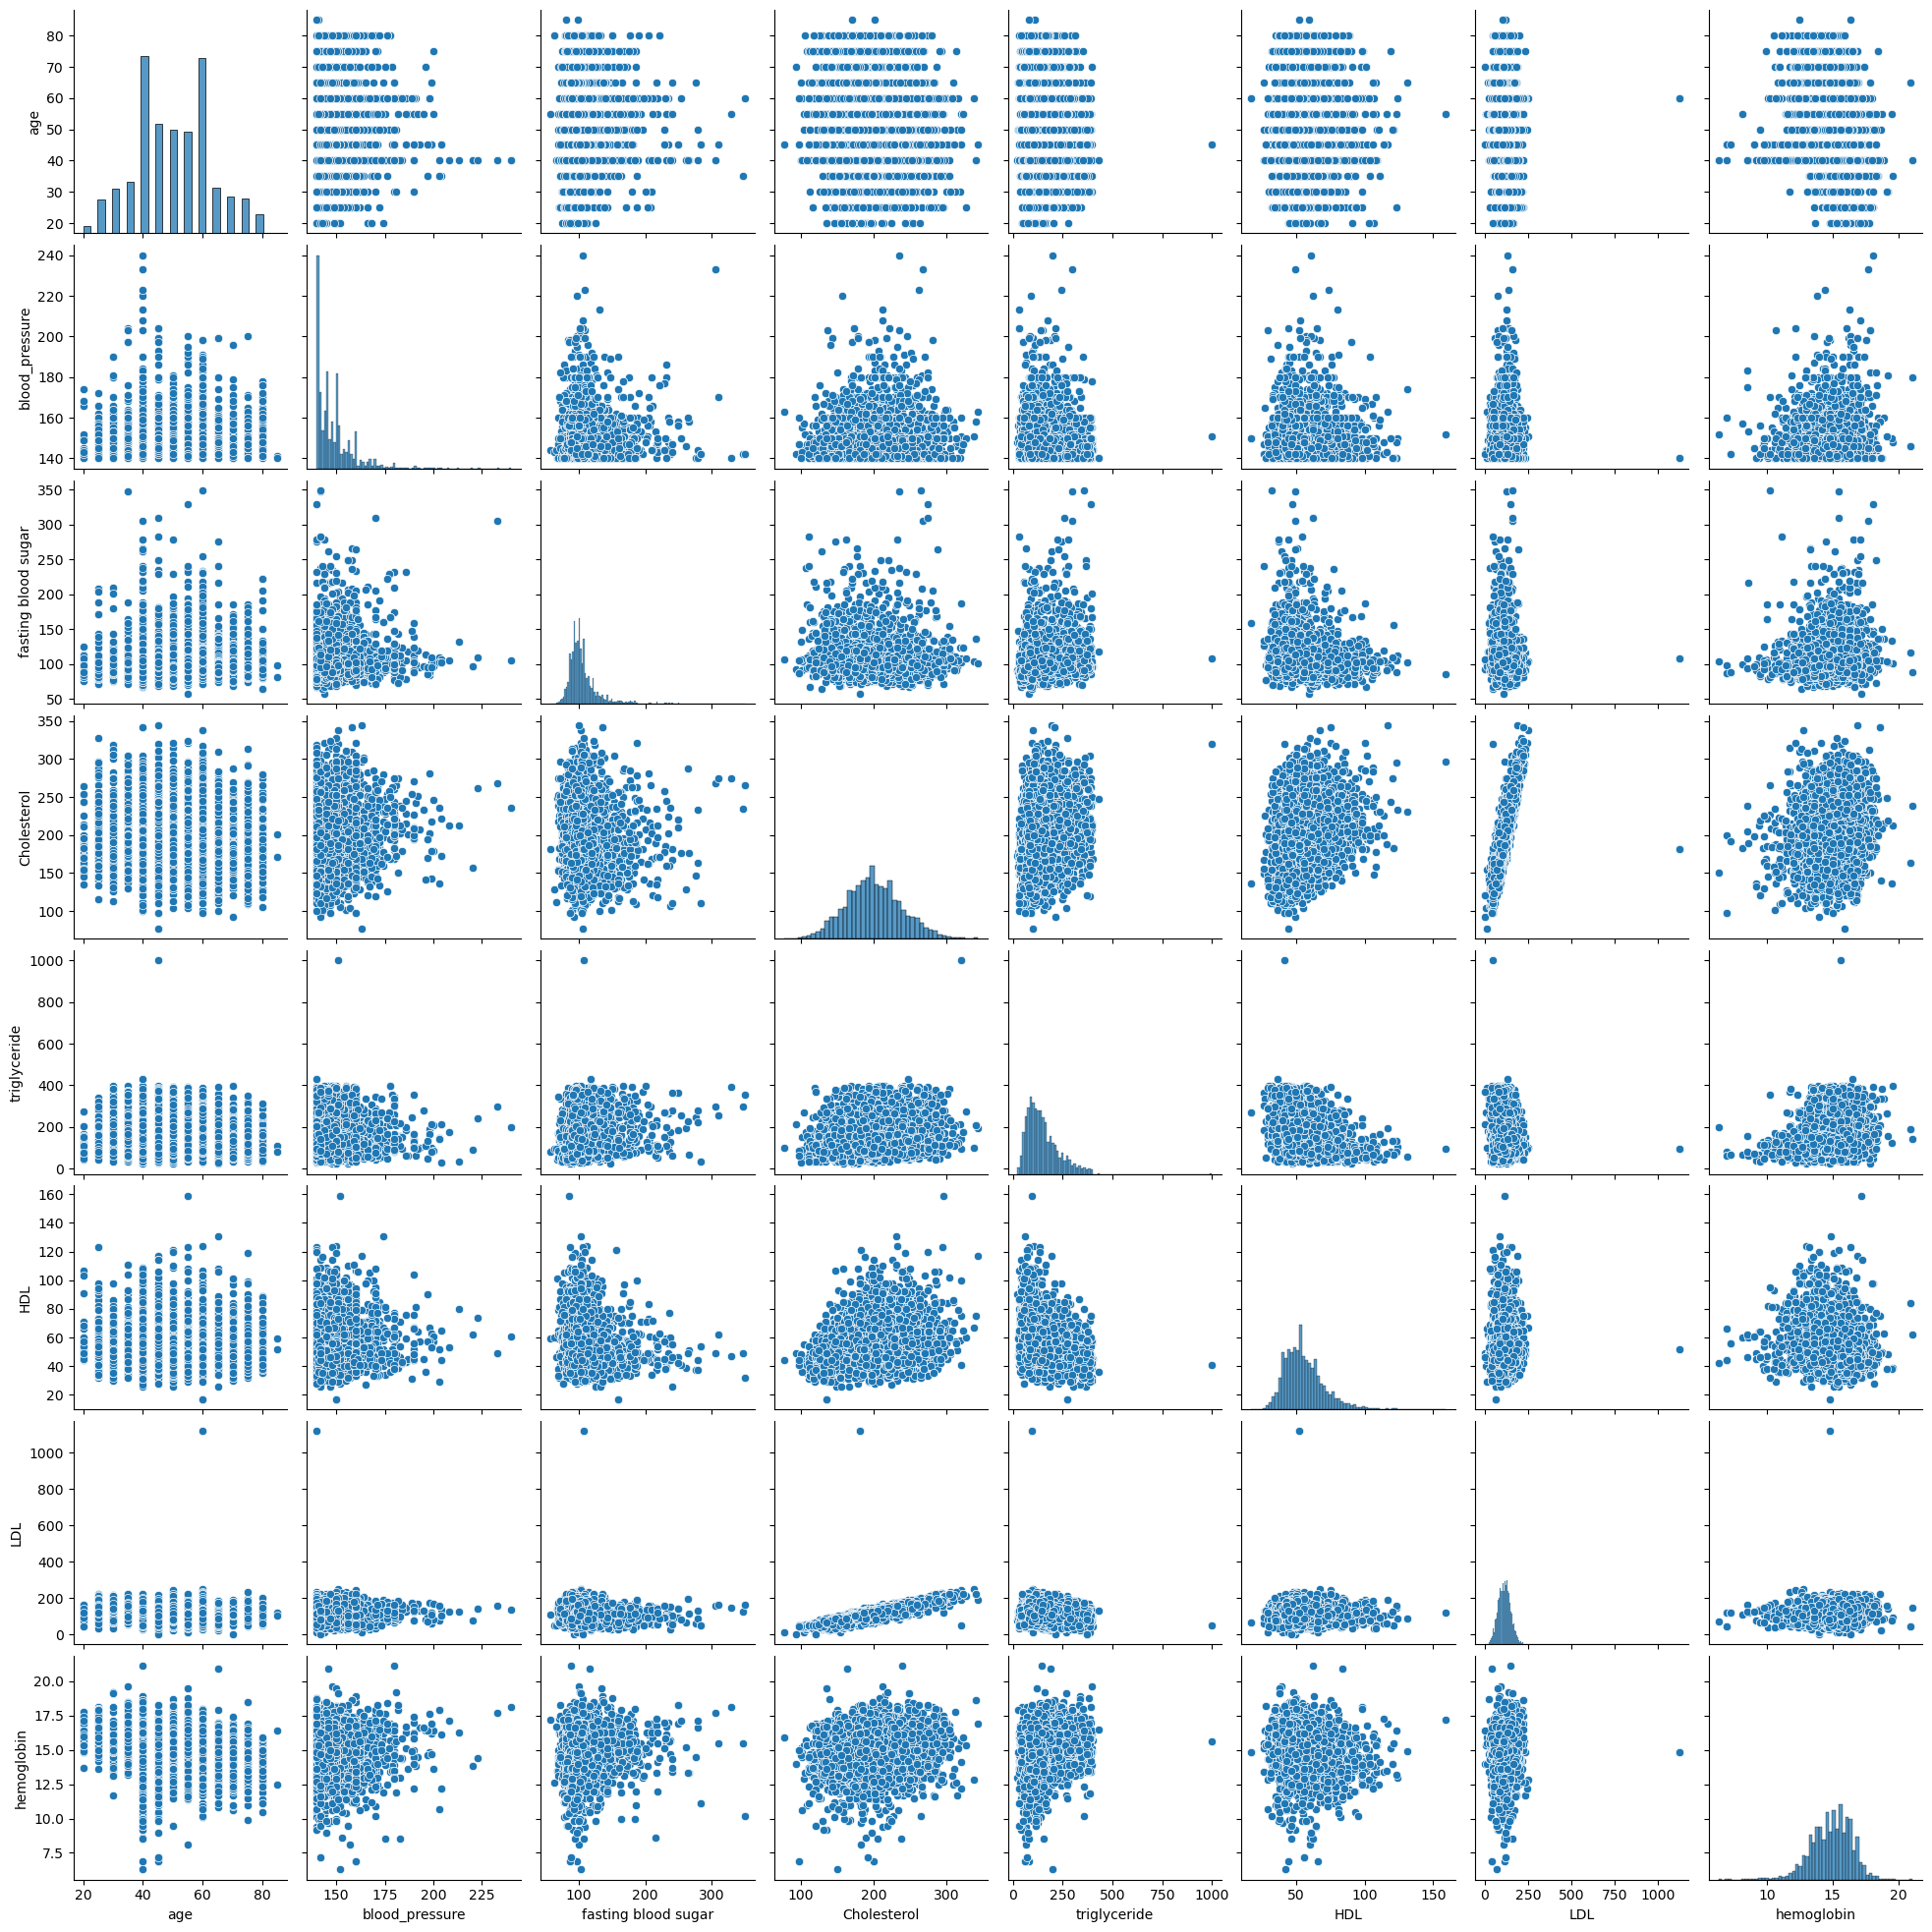

In [89]:
plt.figure(figsize=(20,24))
sns.pairplot(hypertension,vars=['age','blood_pressure','fasting blood sugar','Cholesterol','triglyceride','HDL','LDL','hemoglobin'])
plt.show()

# Senior citizen

In [90]:
ss=data[data['age']>=60]
ss

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
16,18,F,60,128.0,72.0,217.0,79.0,74.0,127.0,13.8,1.0,0.6,22.0,16.0,25.0,0,N,No
18,21,M,60,124.0,115.0,129.0,119.0,62.0,43.0,17.0,1.0,0.9,23.0,19.0,36.0,0,N,Yes
27,34,M,60,130.0,87.0,209.0,234.0,30.0,132.0,14.7,1.0,1.0,31.0,41.0,70.0,0,N,Yes
30,37,F,65,117.0,91.0,210.0,140.0,42.0,139.0,12.9,1.0,0.6,26.0,19.0,28.0,0,Y,No
42,52,M,60,114.0,95.0,223.0,101.0,57.0,146.0,16.1,1.0,1.0,19.0,18.0,37.0,0,N,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55671,55591,F,60,127.0,99.0,226.0,150.0,46.0,150.0,14.2,1.0,1.1,62.0,67.0,41.0,1,Y,No
55673,55596,M,75,138.0,111.0,210.0,384.0,56.0,77.0,14.4,1.0,1.1,46.0,43.0,110.0,0,Y,Yes
55680,55633,F,60,114.0,95.0,220.0,93.0,37.0,164.0,12.1,1.0,0.9,21.0,11.0,45.0,0,Y,No
55686,55673,F,60,102.0,85.0,179.0,53.0,52.0,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,Y,No


In [91]:
ss['gender'].value_counts()

M    5022
F    4217
Name: gender, dtype: int64

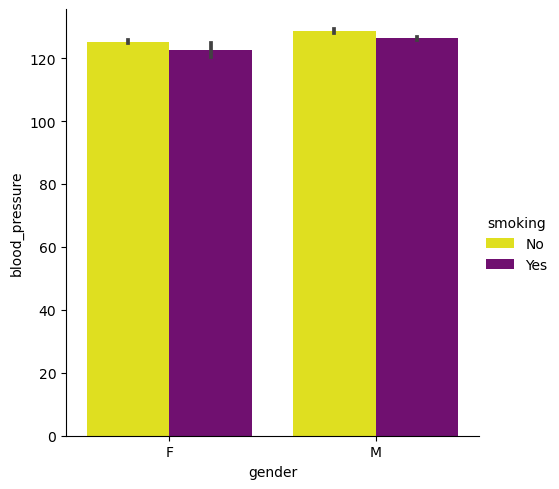

In [92]:
sns.catplot(data=ss,x='gender',y='blood_pressure',hue='smoking',kind='bar',palette=['yellow','purple'])
plt.show()

In [93]:
ss['smoking'].value_counts()

No     6910
Yes    2329
Name: smoking, dtype: int64

In [94]:
ss[(ss['blood_pressure']>=140) & (ss['fasting blood sugar']>=126) & (ss['LDL']>=190)]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
4493,5657,F,60,140.0,135.0,308.0,172.0,65.0,208.0,13.1,1.0,0.6,33.0,42.0,201.0,1,N,No
24102,30100,M,60,164.0,139.0,302.0,244.0,45.0,207.0,15.1,1.0,0.8,70.0,54.0,149.0,0,N,No
26773,33398,M,60,164.0,132.0,299.0,130.0,67.0,206.0,16.3,1.0,0.9,50.0,49.0,104.0,0,N,Yes
47222,13269,F,60,140.0,135.0,308.0,172.0,65.0,208.0,13.1,1.0,0.6,33.0,42.0,201.0,1,N,No


**Hence only four senior citizen having hypertension as well as diabetics and risk of heart attack is very high from which one person is smoker only**

In [95]:
ss.groupby('gender')['smoking'].value_counts().reset_index(name='total')

,gender,smoking,total
0,F,No,4089
1,F,Yes,128
2,M,No,2821
3,M,Yes,2201


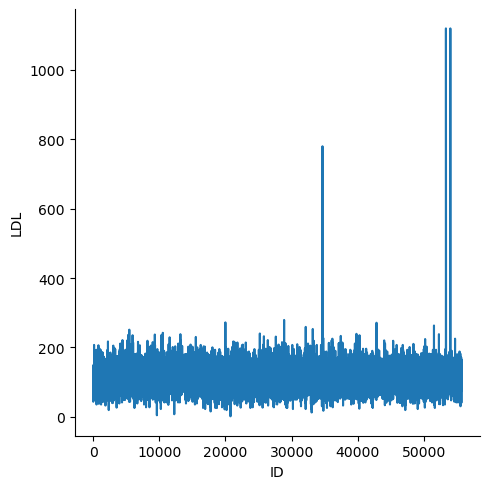

In [96]:
sns.relplot(x='ID',y='LDL',data=ss,kind='line')
plt.show()

In [97]:
ss[ss['LDL']>300]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
27778,34662,F,60,128.0,97.0,152.0,99.0,59.0,780.0,13.0,1.0,0.9,32.0,41.0,22.0,0,Y,No
42649,53318,M,60,140.0,108.0,181.0,96.0,52.0,1120.0,14.8,1.0,0.9,22.0,22.0,56.0,0,N,No
55358,53986,M,60,140.0,108.0,181.0,96.0,52.0,1120.0,14.8,1.0,0.9,22.0,22.0,56.0,0,N,No


In [98]:
data[data['LDL']>300]

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
4623,5827,M,55,123.0,136.0,139.0,111.0,44.0,790.0,15.8,1.0,0.9,24.0,33.0,29.0,0,Y,Yes
6329,7982,M,40,109.0,185.0,161.0,115.0,71.0,910.0,15.3,1.0,1.0,32.0,70.0,43.0,0,N,Yes
9646,12088,M,45,138.0,115.0,192.0,82.0,53.0,1340.0,17.2,1.0,1.2,16.0,15.0,20.0,0,Y,No
11736,14669,M,50,110.0,100.0,172.0,147.0,51.0,1010.0,16.4,1.0,0.9,19.0,21.0,27.0,0,N,No
13911,17344,M,40,110.0,175.0,419.0,204.0,53.0,325.0,16.0,1.0,1.0,26.0,34.0,30.0,0,Y,No
14757,18416,F,45,93.0,88.0,410.0,109.0,52.0,336.0,14.7,1.0,0.8,17.0,18.0,13.0,0,N,No
15277,19065,M,40,120.0,99.0,441.0,276.0,74.0,311.0,15.4,1.0,0.9,27.0,91.0,154.0,0,N,No
17085,21292,M,35,134.0,121.0,258.0,321.0,69.0,1600.0,15.1,1.0,1.1,38.0,65.0,147.0,1,N,Yes
19535,24395,M,45,122.0,94.0,386.0,199.0,39.0,307.0,14.4,1.0,1.1,28.0,33.0,31.0,0,N,Yes
20452,25554,F,40,128.0,105.0,225.0,157.0,47.0,1560.0,14.3,1.0,0.8,17.0,19.0,25.0,1,Y,No


**From this it can be observed that the chances of heart attack doesn't have much correlation with Smoking**

# Youngster

In [99]:
young=data[data['age']<=25]
young

,ID,gender,age,blood_pressure,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,dental_calculus,smoking
26,33,M,25,118.0,101.0,290.0,273.0,62.0,173.0,15.9,1.0,1.0,29.0,35.0,87.0,0,N,No
32,39,M,20,138.0,92.0,129.0,53.0,56.0,62.0,15.3,1.0,0.7,18.0,27.0,35.0,0,Y,Yes
36,43,M,25,116.0,94.0,156.0,53.0,86.0,59.0,14.9,1.0,1.0,18.0,19.0,33.0,0,Y,Yes
39,48,M,20,124.0,102.0,189.0,79.0,50.0,123.0,16.6,1.0,0.9,30.0,28.0,13.0,0,N,No
45,56,M,20,128.0,103.0,185.0,58.0,49.0,124.0,15.5,1.0,1.1,20.0,23.0,23.0,0,N,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55649,55454,M,25,119.0,104.0,202.0,121.0,93.0,84.0,14.6,1.0,0.8,21.0,16.0,26.0,0,N,No
55651,55458,M,20,130.0,92.0,221.0,105.0,75.0,125.0,16.0,1.0,1.1,26.0,18.0,38.0,0,Y,No
55658,55473,M,25,130.0,87.0,291.0,182.0,59.0,195.0,15.8,1.0,0.9,22.0,21.0,43.0,0,Y,No
55666,55553,M,25,130.0,86.0,194.0,144.0,41.0,132.0,15.6,1.0,0.9,20.0,25.0,21.0,0,N,No


In [100]:
young['smoking'].value_counts()

No     2678
Yes    2452
Name: smoking, dtype: int64

In [101]:
young_smoke=young.groupby('gender')['smoking'].value_counts().reset_index(name='total')
young_smoke

,gender,smoking,total
0,F,No,10
1,F,Yes,2
2,M,No,2668
3,M,Yes,2450


In [102]:
# Pivot data
pivot_data = young_smoke.pivot(index='gender', columns='smoking', values='total')

pivot_data

smoking,No,Yes
gender,,
F,10,2
M,2668,2450


clearly we can observe that Male youth are very affected and relies on smoking